# Projet 5 | Segmentation des clients d'un site e-commerce : OLIST
## Partie 1 | Analyse Exploratoire

###### Énoncé du besoin: 
- Olist souhaite fournir à ses équipes d'e-commerce une segmentation des clients utilisable au quotidien pour leurs campagnes de communication.

###### Objectifs :
- Comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles
-  Fournir à l’équipe marketing une description actionnable de notre segmentation et de sa logique sous-jacente pour une utilisation optimale
- Réaliser une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps

  - [Chargement, formats et structures des données](#Chargement,-formats-et-structures-des-données)
  - [Néttoyage des données](#Néttoyage-des-données)
  - [Merge de toutes nos DataFrames](#Merge-de-toutes-nos-DataFrames)
  - [Exploration des données](#Exploration-des-données)
       * [Origines des clients](#Origines-des-clients)
       * [Origines des vendeurs](#Origines-des-vendeurs)
       * [Moyen de payement](#Moyen-de-payement)
       * [Catégories-des-produits](#Catégories-des-produits)
       * [Proportion de clients / aux nombres d'achats](#Proportion-de-clients-/-aux-nombres-d'achats)
       * [Montant total d'achats par client](#Montant-total-d'achats-par-client)
       * [Catégories des produits les plus vendus](#Catégories-des-produits-les-plus-vendus)
       * [Evolution du nombre des commandes journalières](#Evolution-du-nombre-des-commandes-journalières)
       * [Répartition des commandes(mois/jour/heure)](#Répartition-des-commandes(mois/jour/heure))
       * [Chiffre d'affaire sur les mois de l'année](#Chiffre-d'affaire-sur-les-mois-de-l'année)
       * [Répartion des notes attribuées aux commandes](#Répartion-des-notes-attribuées-aux-commandes)
       * [Nombre moyen d'articles par commande](#Nombre-moyen-d'articles-par-commande)
       

  - [Origines des clients](#Origines-des-clients)
  - [Origines des vendeurs](#Origines-des-vendeurs)
  - [Montant total d'achats](#Montant-total-d'achats)
  - [Fréquence d'achats](#Fréquence-d'achats)
  - [Nombre de produits achetés par client](#Nombre-de-produits-achetés-par-client)
  - [Evaluation de la relation entre les variables avec la corrélation de Pearson](#Evaluation-de-la-relation-entre-les-variables-avec-la-corrélation-de-Pearson)
  - [Transformation des dates d'achats en nombre de jours écoulés](#Transformation-des-dates-d'achats-en-nombre-de-jours-écoulés)
  -[Nombre d'achats total en fonction du temps](#Nombre-d'achats-total-en-fonction-du-temps)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

import datetime as dt

In [4]:
from IPython.display import display_html

In [5]:
pd.set_option("display.max_colwidth", 150)

In [6]:
def get_types_objects(df):
    df_object = pd.DataFrame()
    df_float = pd.DataFrame()
    df_int = pd.DataFrame()
    df_bool = pd.DataFrame()
    for col in df.columns:
        if ((df[col].dtypes == 'object')):
            df_object[col] = df[col]
        elif (df[col].dtypes == 'int64'):
            df_int[col] = df[col]
        elif((df[col].dtypes == 'bool')):
            df_bool[col] = df[col]
        else:
            df_float[col] = df[col]
            
    return df_object, df_int, df_float,df_bool

In [7]:
def formats(dataframe, name):
    formats = pd.DataFrame([dataframe.shape],
                       columns=['Nbre de lignes','Nbre de variables'],
                       index=[''])
    return formats

La majorité des clients se situent à Sao Paulo et Rio de Janeiro

In [8]:
def format_types_data(df, name):
    vars_objet, vars_int, vars_float, vars_bool = get_types_objects(df)
    #display(formats(df, name)),display(vars_types(df))
    display(formats(df, name),vars_types(df))

In [9]:
def vars_types(df):
    df_objet, df_int, df_float, df_bool = get_types_objects(df)
    types = {'Objet':df_objet.shape[1],
        'Float':df_float.shape[1],
        'Int':df_int.shape[1],
        'Bool':df_bool.shape[1]
    }
    return pd.DataFrame([types.values()], columns=types.keys(),index=[''])

In [10]:
def calculModalites(df, column):
    mods = pd.DataFrame(df[df[column].notnull()][column].value_counts(normalize=False))
    modalites = pd.DataFrame(mods.values, index=mods.index, columns=['Nbre Modalité']).sort_index()
    modalites.index.names = ['Modalités']
    return modalites

In [11]:
def visuliser_nan(df):
    missing_data = round(df.isna().sum()*100/len(df),1)
    missing_data = pd.DataFrame(missing_data.reset_index())
    missing_data.columns=["variable","données manquantes"]
    missing_data = missing_data.sort_values(by="données manquantes",ascending=False)
    missing_data1 = missing_data
    fig = missing_data1.sort_values(by="données manquantes",ascending=True).plot.bar(x="variable", y="données manquantes",figsize=(16,7),color="coral",width=0.7)
    plt.xlabel('Variables',fontsize=14)
    plt.ylabel('Pourcentage de données manquantes', fontsize=14)
    fig.set_title("Taux de données manquantes",fontsize=16)

In [12]:
def dessinerCamembert(df, col):
    plt.figure(figsize=(20,8))

    colors = sns.color_palette('bright')[0:5]
    plt.title('Répartition des '+col+' en %', size=20)
    wedges, texts, autotexts = plt.pie(df[col].value_counts().values, 
            labels = df[col].value_counts().index.str.upper(),
           autopct='%1.1f%%', textprops={'fontsize': 16 } , colors = colors)


    ax = plt.gca()

    ax.legend(wedges, df[col].value_counts().index.str.upper(),
              title=col,
              loc="upper left",
              fontsize=14,
              bbox_to_anchor=(1, 0, 0.5, 1))
    #fct_exp.save_fig("repartition_grades_nutriscores_perc")



    plt.figure(figsize=(20,8))

    sns.set_theme(style="whitegrid")
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title('Répartition des '+col, size=20)
    plt.show()

In [13]:
def data_count_percent(dataframe):
    for col in dataframe.columns:
        data_count_percent = pd.DataFrame({
            'count': dataframe.isna().sum(),
            'percent': 100 * dataframe.isna().sum() / dataframe.shape[0]})
        # Transposition de la data
        
    return data_count_percent.sort_values(by = 'percent')

In [14]:
def colunmLigneDuplicated(dataframe, name):
    a = dataframe.columns.duplicated().sum()
    b = dataframe.duplicated().sum()
    duplicated = pd.DataFrame([(str(a),str(b))],
                       columns=['Colonnes dupliquées','Lignes dupliquées'],
                       index=[name])
    return duplicated

In [15]:
def get_types_objects(df):
    df_object = pd.DataFrame()
    df_float = pd.DataFrame()
    df_int = pd.DataFrame()
    df_bool = pd.DataFrame()
    for col in df.columns:
        if ((df[col].dtypes == 'object')):
            df_object[col] = df[col]
        elif (df[col].dtypes == 'int64'):
            df_int[col] = df[col]
        elif((df[col].dtypes == 'bool')):
            df_bool[col] = df[col]
        else:
            df_float[col] = df[col]
            
    return df_object, df_int, df_float,df_bool

In [16]:
def transformToDate(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column].str.split().str[0], format="%Y/%m/%d").copy()

In [17]:
def transformToDateHMS(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], format="%Y/%m/%d %H:%M:%S").copy()

In [18]:
def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h3>{title}</h3> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)

In [19]:
import unicodedata
def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print (f"Durée d'exécution de {f.__name__}: {te-ts}s")
        return result

    return timed


def strip_accents(text):
    """
    Strip accents from input String.

        param text: The input string.
        type text: String.

    returns: The processed String.
    rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFKD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

### Chargement, formats et structures des données

- chargement des données

In [20]:
# informations clients
Clients = pd.read_csv('data/olist_customers_dataset.csv')
# informations géolocalisation
Geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
# informations sur les items de commande
Items_commandes = pd.read_csv('data/olist_order_items_dataset.csv')
# informations payements
Paiements_commandes = pd.read_csv('data/olist_order_payments_dataset.csv')
# informations sur l'évaluation des produits oar les clients
Avis_commande = pd.read_csv('data/olist_order_reviews_dataset.csv')
# informations commandes
Commandes = pd.read_csv('data/olist_orders_dataset.csv')
# informations produits
Produits = pd.read_csv('data/olist_products_dataset.csv')
# informations vendeurs
Vendeurs = pd.read_csv('data/olist_sellers_dataset.csv')
# traduction des noms des catégories des produits
Trad_cat_produits = pd.read_csv('data/product_category_name_translation.csv')

- Formats et stryctures de nos données

In [21]:
# dataframes
dfs_names = {
    'Clients' : Clients,
    'Geolocation' : Geolocation,
    'Items_commandes' : Items_commandes,
    'Paiements_commandes' : Paiements_commandes,
    'Avis_commande' : Avis_commande,
    'Commandes' : Commandes,
    'Produits' : Produits,
    'Vendeurs' : Vendeurs,
    'Trad_cat_produits' : Trad_cat_produits
}
# formats et structures de données
for name,df in dfs_names.items():
    df1 = formats(df, name)
    df2 = vars_types(df)
    df3 = colunmLigneDuplicated(df,'')
    dfs = {name: df1, 'Types de variables': df2, 'Colonnes/Lignes dupliquées':df3}
    display_dfs(dfs, justify='flex-start')
    print('----------------------------------------------------------------------------------------')
    print()

Clients 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 99441 
 5 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 4 
 0 
 1 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



Geolocation 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 1000163 
 5 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 2 
 2 
 1 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 261831

----------------------------------------------------------------------------------------



Items_commandes 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 112650 
 7 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 4 
 2 
 1 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



Paiements_commandes 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 103886 
 5 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 2 
 1 
 2 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



Avis_commande 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 99224 
 7 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 6 
 0 
 1 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



Commandes 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 99441 
 8 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 8 
 0 
 0 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



Produits 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 32951 
 9 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 2 
 7 
 0 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



Vendeurs 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 3095 
 4 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 3 
 0 
 1 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



Trad_cat_produits 

 
 
 
 
 Nbre de lignes 
 Nbre de variables 
 
 
 
 
 
 71 
 2 
 
 
 
 Types de variables 

 
 
 
 
 Objet 
 Float 
 Int 
 Bool 
 
 
 
 
 
 2 
 0 
 0 
 0 
 
 
 
 Colonnes/Lignes dupliquées 

 
 
 
 
 Colonnes dupliquées 
 Lignes dupliquées 
 
 
 
 
 
 0 
 0

----------------------------------------------------------------------------------------



- On constate que les DataFrames **Clients** et **Commandes** ont même nombre d'observations : 99441 et **Avis_commande** en posséde 99224.
- En tout, on a 32951 produits
- On constate que seule la dataFrame **Geolocation** possedé des lignes dupliquées (261831 lignes)
- Dans toutes las DataFrames, on n'a aucune variable de type booléenne.

### Néttoyage des données

- Valeurs manquantes

In [22]:
Clients_nan = data_count_percent(Clients)
Geolocation_nan = data_count_percent(Geolocation)
Items_commandes_nan = data_count_percent(Items_commandes)
Paiements_commandes_nan = data_count_percent(Paiements_commandes)
Avis_commande_nan = data_count_percent(Avis_commande)
Commandes_nan = data_count_percent(Commandes)
Produits_nan = data_count_percent(Produits)
Vendeurs_nan = data_count_percent(Vendeurs)
Trad_cat_produits_nan = data_count_percent(Trad_cat_produits)

dfs_1 = {'Clients':Clients_nan, 'Geolocation':Geolocation_nan, 'Items_commandes':Items_commandes_nan}
dfs_2 = {'Paiements_commandes':Paiements_commandes_nan, 'Avis_commande':Avis_commande_nan, 'Commandes':Commandes_nan}
dfs_3 = {'Produits':Produits_nan, 'Vendeurs':Vendeurs_nan, 'Trad_cat_produits':Trad_cat_produits_nan}

display_dfs(dfs_1, justify='flex-start')
display_dfs(dfs_2, justify='flex-start')
display_dfs(dfs_3, justify='flex-start')

,count,percent
customer_id,0,0.0
customer_unique_id,0,0.0
customer_zip_code_prefix,0,0.0
customer_city,0,0.0
customer_state,0,0.0
,count,percent
geolocation_zip_code_prefix,0,0.0
geolocation_lat,0,0.0
geolocation_lng,0,0.0
geolocation_city,0,0.0


,count,percent
order_id,0,0.0
payment_sequential,0,0.0
payment_type,0,0.0
payment_installments,0,0.0
payment_value,0,0.0
,count,percent
review_id,0,0.000000
order_id,0,0.000000
review_score,0,0.000000
review_creation_date,0,0.000000


,count,percent
product_id,0,0.000000
product_weight_g,2,0.006070
product_length_cm,2,0.006070
product_height_cm,2,0.006070
product_width_cm,2,0.006070
product_category_name,610,1.851234
product_name_lenght,610,1.851234
product_description_lenght,610,1.851234
product_photos_qty,610,1.851234
,count,percent


- On constate que les DataFrames **Avis_commande**, **Commandes** et **Produits** possédent des valeurs manquantes mais seule **Avis_commande** comporte une variable dépassant les 88% de nan

- Nous supprimons les commandes dont la variable **order_approved_at** est remplie de nan (il y en a 160)

In [23]:
Commandes.dropna(subset=['order_approved_at'],inplace=True)

- Nous remplaçons les nan de la variable **product_category_name** par 'Unkwown'

In [24]:
#on va remplacer les nan de la categorie par unkwon
Produits['product_category_name'].fillna('Unkwown',inplace=True)

- Traduction des noms des catégories en anglais

In [25]:
# Remplacement des noms des noms de catégories de produits (Portugais --> Anglais)
products_name_dict = dict(zip(Trad_cat_produits.product_category_name, Trad_cat_produits.product_category_name_english))
Produits = Produits.replace({"product_category_name": products_name_dict})

- Transformer les variables contenant des valeurs chronologiques en Objet DateTime

In [26]:
transformToDateHMS(Items_commandes, ['shipping_limit_date'])
transformToDateHMS(Avis_commande, ['review_creation_date','review_answer_timestamp'])
transformToDateHMS(Commandes, ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])

In [27]:
# la plus vieille date de commande 
print(Commandes["order_approved_at"].min())
# la plus récente date de commande
print(Commandes["order_approved_at"].max())

2016-09-15 12:16:38
2018-09-03 17:40:06


In [28]:
Commandes.order_status.value_counts()

delivered      96464
shipped         1107
unavailable      609
canceled         484
invoiced         314
processing       301
approved           2
Name: order_status, dtype: int64

In [29]:
# On s'interesse juste par les commandes livrées
Commandes = Commandes[Commandes["order_status"] == "delivered"]

### Merge de toutes nos DataFrames

In [30]:
df_1 = pd.merge(Clients,Commandes,on="customer_id")
df_2 = pd.merge(df_1,Items_commandes,on="order_id")
df_3 = pd.merge(df_2,Produits,on="product_id")
df_4 = pd.merge(df_3,Avis_commande,on="order_id")
df_5 = pd.merge(df_4,Paiements_commandes,on="order_id")
df_final = pd.merge(df_5,Vendeurs,on="seller_id")

In [31]:
df_final.shape

(114844, 39)

In [32]:
colunmLigneDuplicated(df_final,'')

,Colonnes dupliquées,Lignes dupliquées
,0,0


In [33]:
# supprimer les lignes dupliquées en se basant sur l'id unique des commandes
df_final = df_final.drop_duplicates(subset="customer_id")

In [34]:
df_final.shape

(95817, 39)

### Exploration des données

### Origines des clients

In [35]:
df_final.customer_city.value_counts()

sao paulo                14945
rio de janeiro            6529
belo horizonte            2681
brasilia                  2061
curitiba                  1481
                         ...  
alexandrita                  1
amarante                     1
capela do alto alegre        1
itaara                       1
tangara                      1
Name: customer_city, Length: 4083, dtype: int64

In [36]:
cities_cust = df_final.customer_city.value_counts()[:6]

Text(0.5, 1.0, 'Origines des clients')

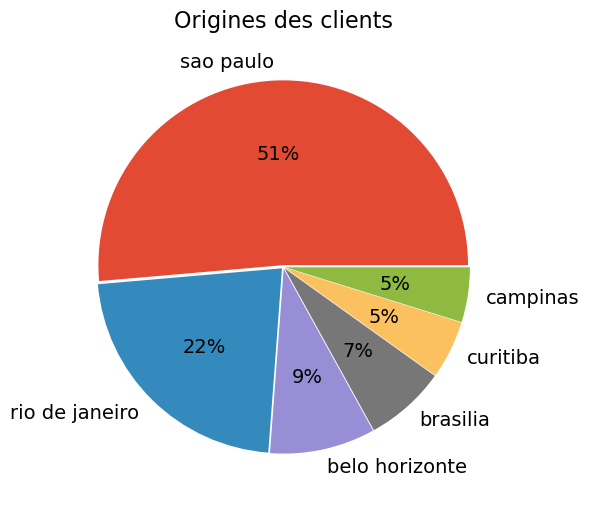

In [37]:
fig, ax = plt.subplots(figsize =(6, 6))
ax.pie(cities_cust, labels = cities_cust.index, autopct = '%.0f%%',explode=[0.01]*6,textprops={'fontsize': 14})
ax.set_title("Origines des clients",fontsize=16)

La majorité des clients se situent à Sao Paulo et Rio de Janeiro

### Origines des vendeurs

In [38]:
df_final.seller_city.value_counts()

sao paulo         23695
ibitinga           6346
curitiba           2631
santo andre        2599
belo horizonte     2307
                  ...  
são paulo            1
jarinu                1
imigrante             1
castro pires          1
janauba               1
Name: seller_city, Length: 594, dtype: int64

In [39]:
cities_seller = df_final.seller_city.value_counts()[:6]

Text(0.5, 1.0, 'Origines des vendeurs')

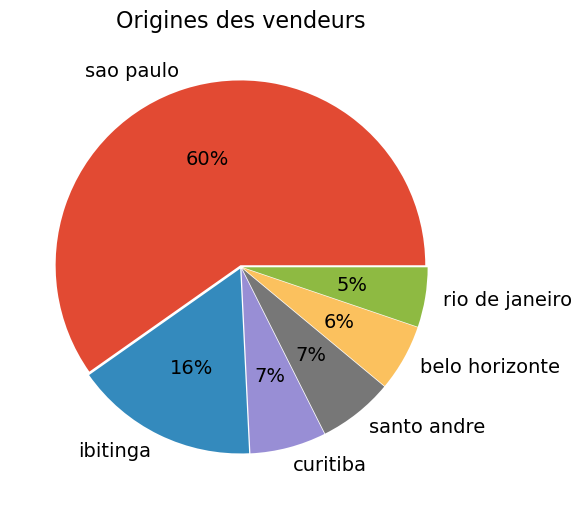

In [40]:
fig, ax = plt.subplots(figsize =(6, 6))
ax.pie(cities_seller, labels = cities_seller.index, autopct = '%.0f%%',explode=[0.01]*6,textprops={'fontsize': 14})
ax.set_title("Origines des vendeurs",fontsize=16)

La plus part des vendeurs se situent à Sao Paulo

### Moyen de payement

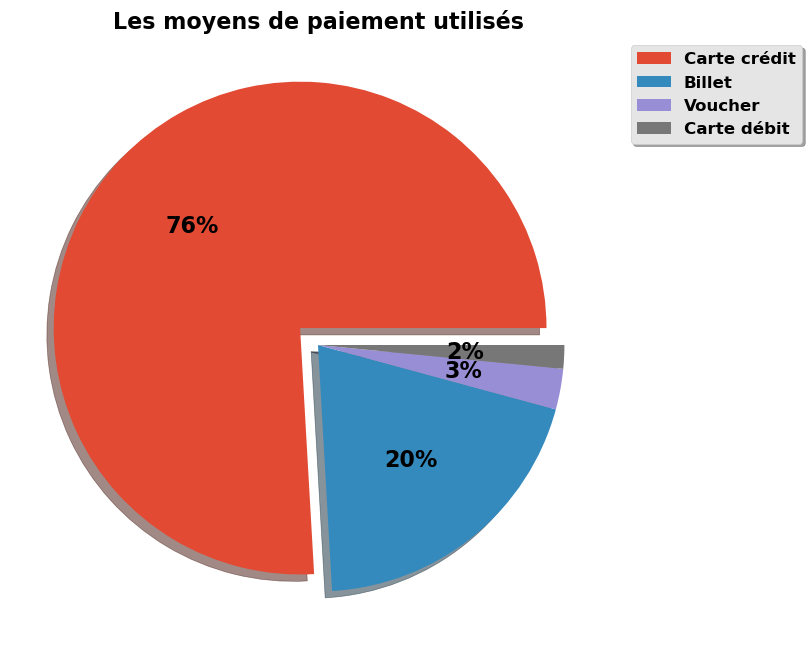

In [41]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect='equal'))
explode = (0.1, 0, 0, 0)
legend = ['Carte crédit', 'Billet', 'Voucher',
          'Carte débit']

p =df_final['payment_type'][df_final['payment_type'] != 'not_defined'].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0,
       explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True,
       textprops={'weight': 'bold', 'fontsize': 16}, 
       ax=ax)
ax.legend(legend, loc='best', shadow=True,
          prop={'weight': 'bold', 'size': 12},
          bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.title('Les moyens de paiement utilisés', fontweight='bold', size=16)
plt.ylabel("")
plt.show()

La plus des payements sont effectués par Carte de crédit

### Catégories des produits

In [42]:
df_final['product_category_name'].value_counts()

bed_bath_table               9113
health_beauty                8565
sports_leisure               7446
computers_accessories        6473
furniture_decor              6145
                             ... 
cds_dvds_musicals              12
la_cuisine                     11
pc_gamer                        7
fashion_childrens_clothes       5
security_and_services           2
Name: product_category_name, Length: 74, dtype: int64

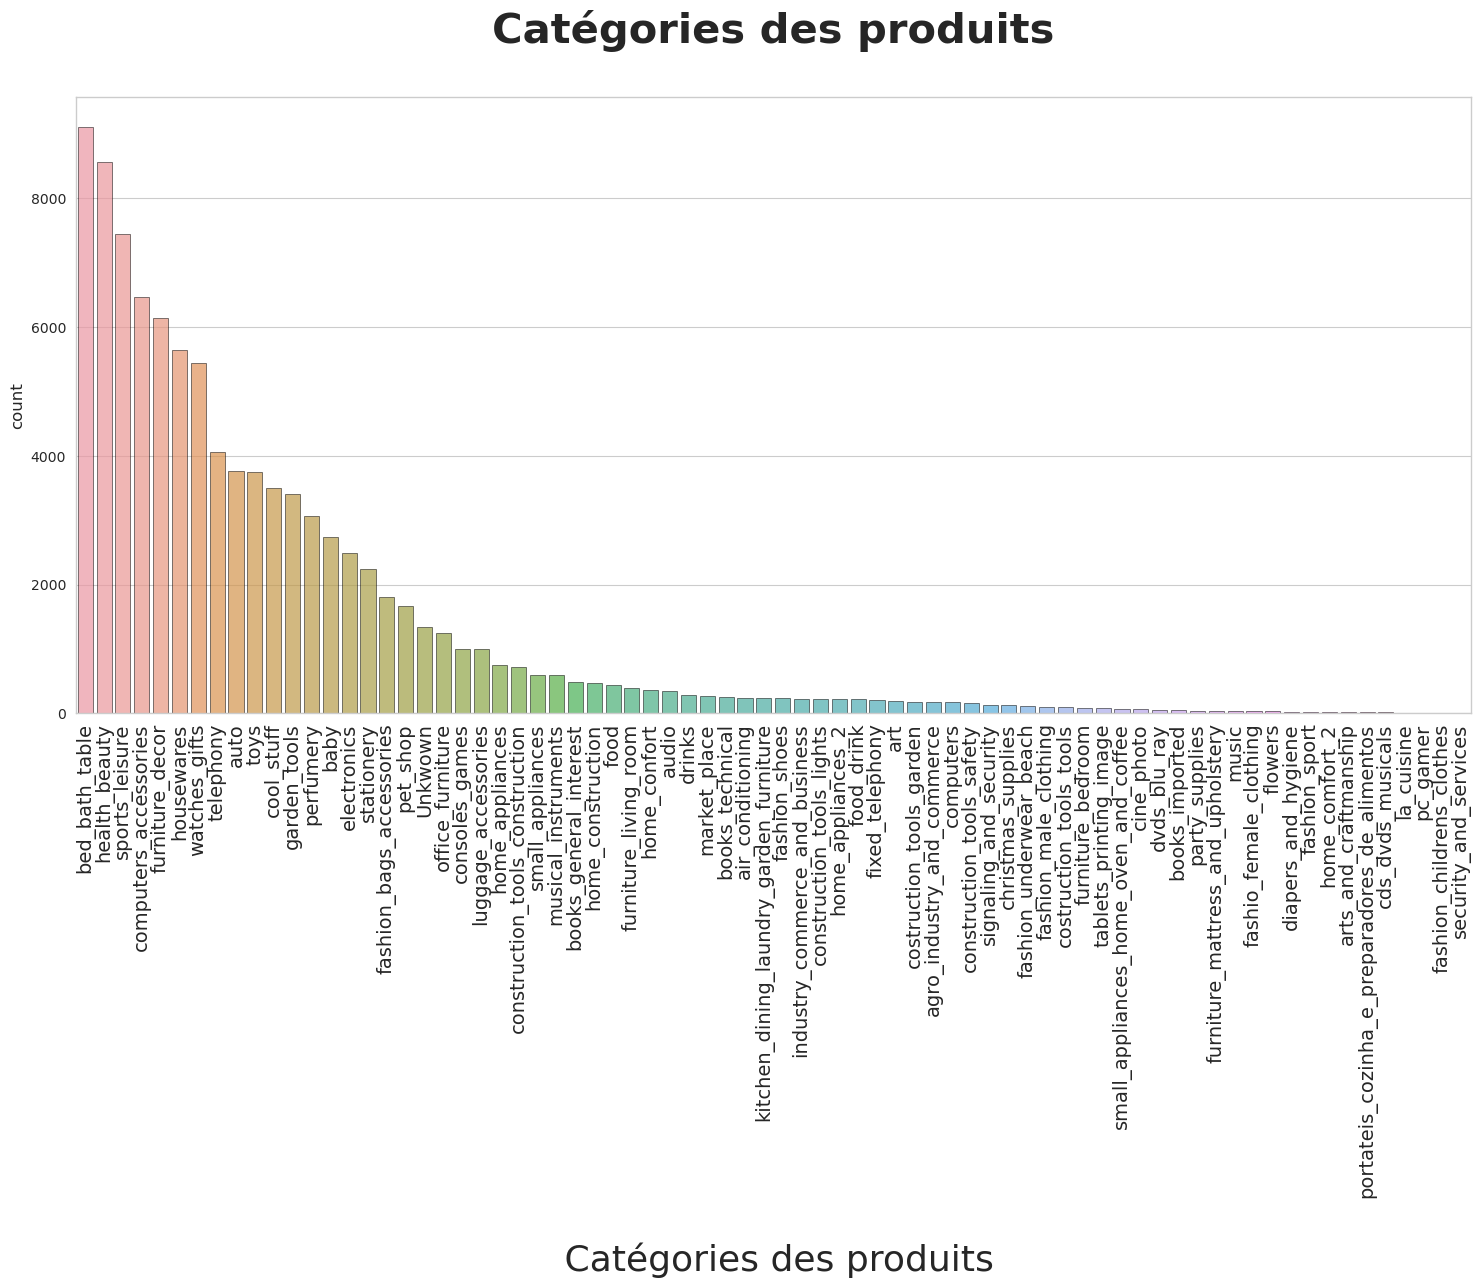

In [43]:
# Categories des produits
sns.set_style("whitegrid")
sns.set_palette(sns.dark_palette("blue", reverse="True"))
font_title = {"weight": "bold",
              "size": 30}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df_final, x="product_category_name",
              edgecolor="black",
              order = df_final['product_category_name'].value_counts().index,
              alpha=0.7)
plt.xticks(rotation=90, size=14)
plt.title(f"Catégories des produits\n",
          fontdict=font_title)
plt.xlabel('\n Catégories des produits', fontsize=26)
plt.show()

### Proportion de clients / aux nombres d'achats

- Nombre de clients total

In [44]:
print("Notre jeu de données compte {} clients".format(Clients.customer_unique_id.unique().shape[0]))

Notre jeu de données compte 96096 clients


- Leurs proportions d'achats

In [45]:
# Nbre de clients en fonction du nbre d'achats
def nbre_client_achats(nb_achat):
    clients = df_final.groupby("customer_unique_id").filter(lambda x: len(x) == nb_achat)
    print("Notre jeu de données contient {} clients qui ont procédé à {} achats".format(clients.customer_unique_id.unique().shape[0],nb_achat))

In [46]:
nbre_client_achats(3)

Notre jeu de données contient 175 clients qui ont procédé à 3 achats


In [47]:
cust_1achat = df_final.groupby("customer_unique_id").filter(lambda x: len(x) == 1)
print("Notre jeu de données contient {} clients qui ont procédé à 1 achat".format(cust_1achat.customer_unique_id.unique().shape[0]))
un_achat = cust_1achat.customer_unique_id.unique().shape[0]

Notre jeu de données contient 89978 clients qui ont procédé à 1 achat


In [48]:
cust_plus1achat = df_final.groupby("customer_unique_id").filter(lambda x: len(x) > 1)
print("Notre jeu de données contient {} clients qui ont procédé à plus d'un achat".format(cust_plus1achat.customer_unique_id.unique().shape[0]))
plus1achat = cust_plus1achat.customer_unique_id.unique().shape[0]

Notre jeu de données contient 2763 clients qui ont procédé à plus d'un achat


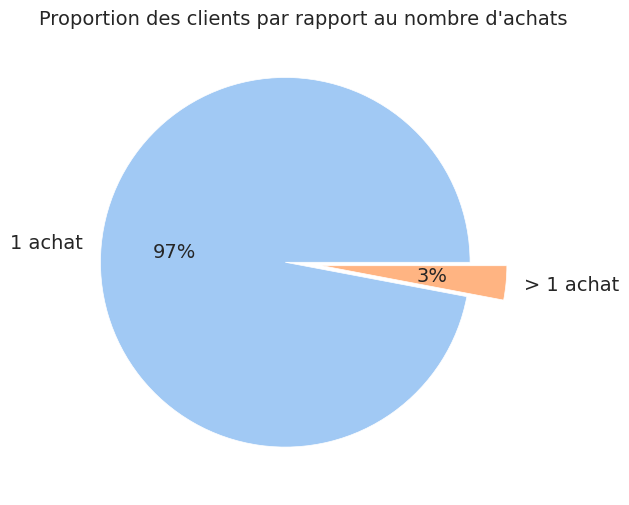

In [49]:
plt.figure(figsize=(6, 6))
data = [un_achat, plus1achat]
labels = ["1 achat","> 1 achat"]

colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 14},pctdistance=0.6,explode=[0.1]*2)
plt.title("Proportion des clients par rapport au nombre d'achats",fontsize=14)
plt.show()

On constate que seulement 3% des clients qui ont procédé à plus d'un achat.

### Montant total d'achats par client

- A cet éffet, nous allons faire un merge entre les dataframes suivantes : **Clients**, **Commandes**, et **Items_commandes** 

In [50]:
#Renommer les colonnes 'price' et 'freight_value' en 'Montant' et 'Frèt'
df_final = df_final.rename(columns={"price":"Montant"})
# On regroupe par 'customer_unique_id'
group_clients = df_final.groupby(by="customer_unique_id").sum()
# Montant total pour chaque client sans le prix du frèt
montant_clients = group_clients.sort_values(by="Montant",ascending=False)

Text(0.5, 1.0, "Le montant total(en Réal)  payé par chaque client pour l'ensemble de ses achats")

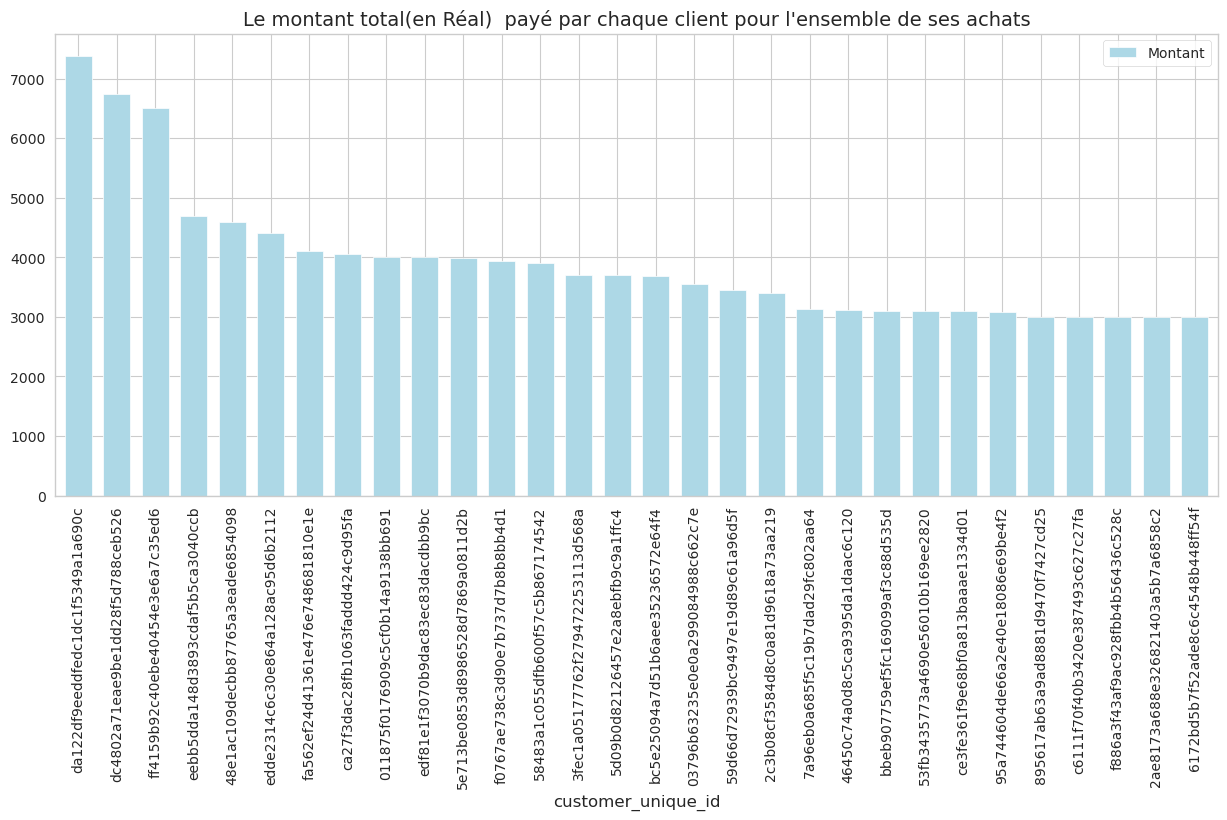

In [51]:
ax = montant_clients[:30].plot.bar(y="Montant",figsize=(15,6),color="lightblue",width=0.7)
ax.set_title("Le montant total(en Réal)  payé par chaque client pour l'ensemble de ses achats", fontsize=14)

- Dispersion de la variable **Montant**

[Text(0.5, 1.0, "boxplot des montants payés par les clients sur l'ensemble des achats")]

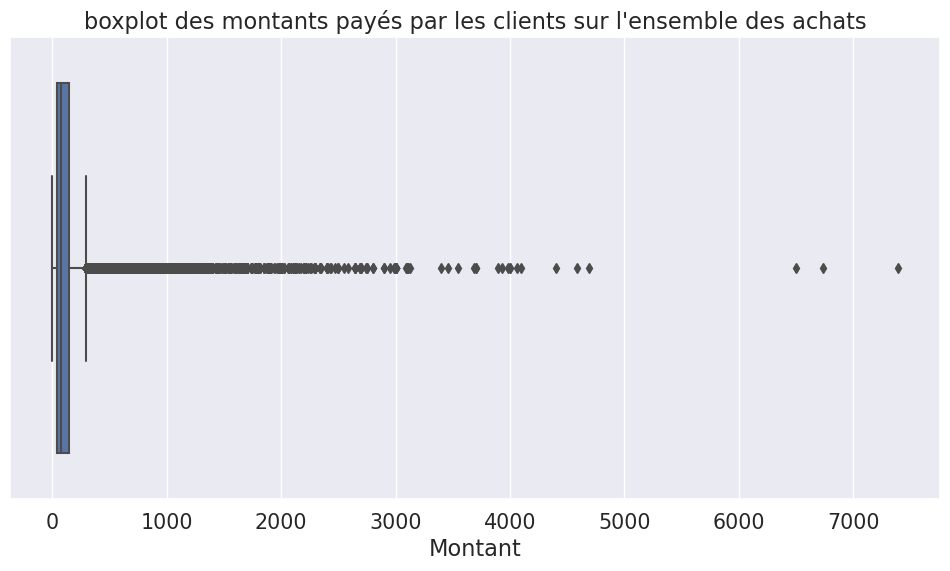

In [52]:
plt.figure(figsize=(12,6))
sns.set(font_scale = 1.35)

sns.boxplot(x="Montant",data=montant_clients).set(title="boxplot des montants payés par les clients sur l'ensemble des achats")


In [53]:
Q1 = montant_clients.Montant.quantile(0.25)
Q3 = montant_clients.Montant.quantile(0.75)
IQR = Q3-Q1
Limite_inf = Q1 - (1.5 * IQR)
Limite_sup = Q3 + (1.5 * IQR)

print("Q1 : {} - Q3 : {}  - Limite_inf : {} - Limite_sup : {} ".format(Q1, Q3, Limite_inf, Limite_sup))

#montant_clients.Montant.loc[montant_clients.Montant > Limite_sup] = Limite_sup

Q1 : 43.29 - Q3 : 144.0  - Limite_inf : -107.775 - Limite_sup : 295.065 


In [54]:
len(montant_clients[montant_clients.Montant>Limite_sup])

7249

In [55]:
len(montant_clients[montant_clients.Montant>Q3])

23176

In [56]:
montant_clients['Montant'].mean()

129.18973668621584

[Text(0.5, 1.0, "boxplot des montants payés par les clients sur l'ensemble des achats")]

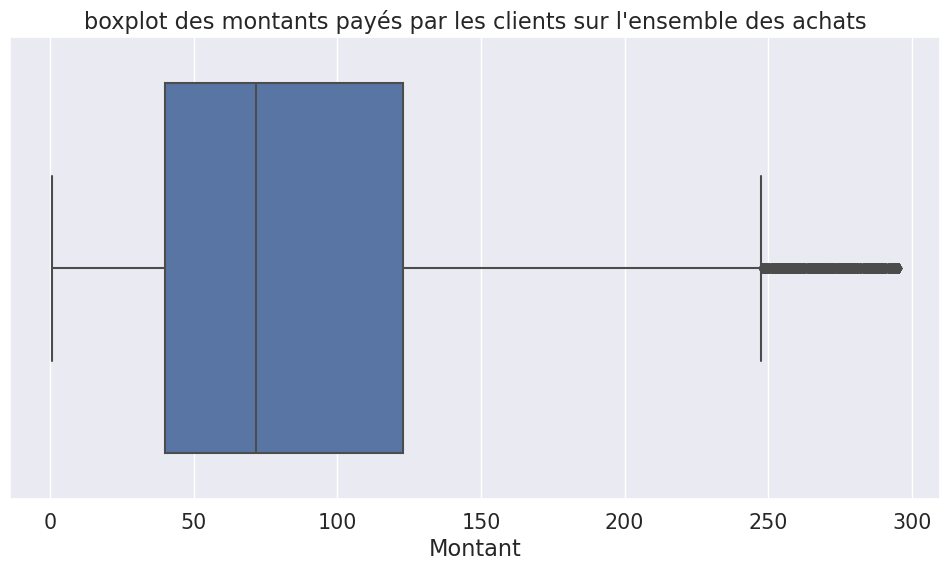

In [57]:
plt.figure(figsize=(12,6))
sns.set(font_scale = 1.35)

sns.boxplot(x="Montant",data=montant_clients[montant_clients.Montant <= Limite_sup]).set(title="boxplot des montants payés par les clients sur l'ensemble des achats")


### Catégories des produits les plus vendus

In [58]:
# On regroupe par 'customer_unique_id'
group_produits = df_final.groupby(by="product_id").count()
# Montant total pour chaque client sans le prix du frèt
group_produits_ = group_produits.sort_values(by="product_category_name",ascending=False)

Text(0.5, 1.0, 'Catégories des produits les plus vendus')

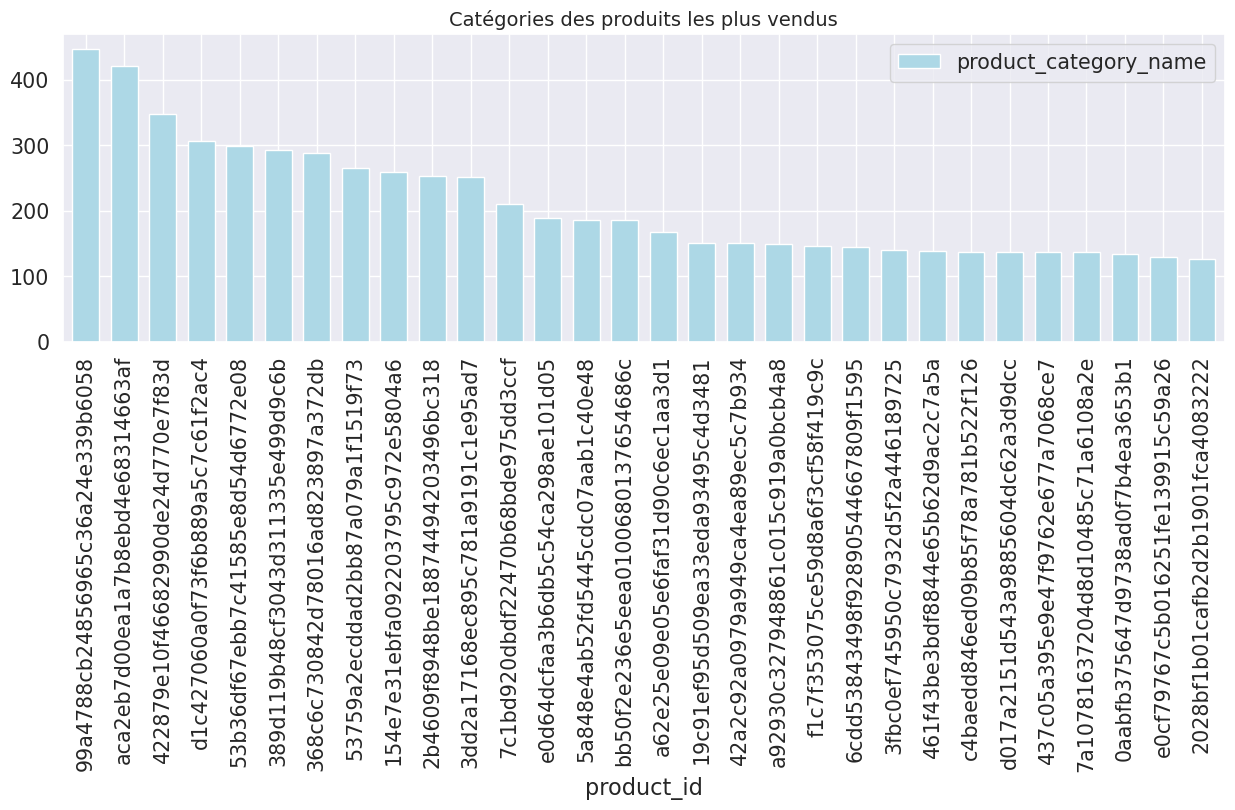

In [59]:
ax = group_produits_[:30].plot.bar(y="product_category_name",figsize=(15,4),color="lightblue",width=0.7)
ax.set_title("Catégories des produits les plus vendus", fontsize=14)

### Evolution du nombre des commandes journalières

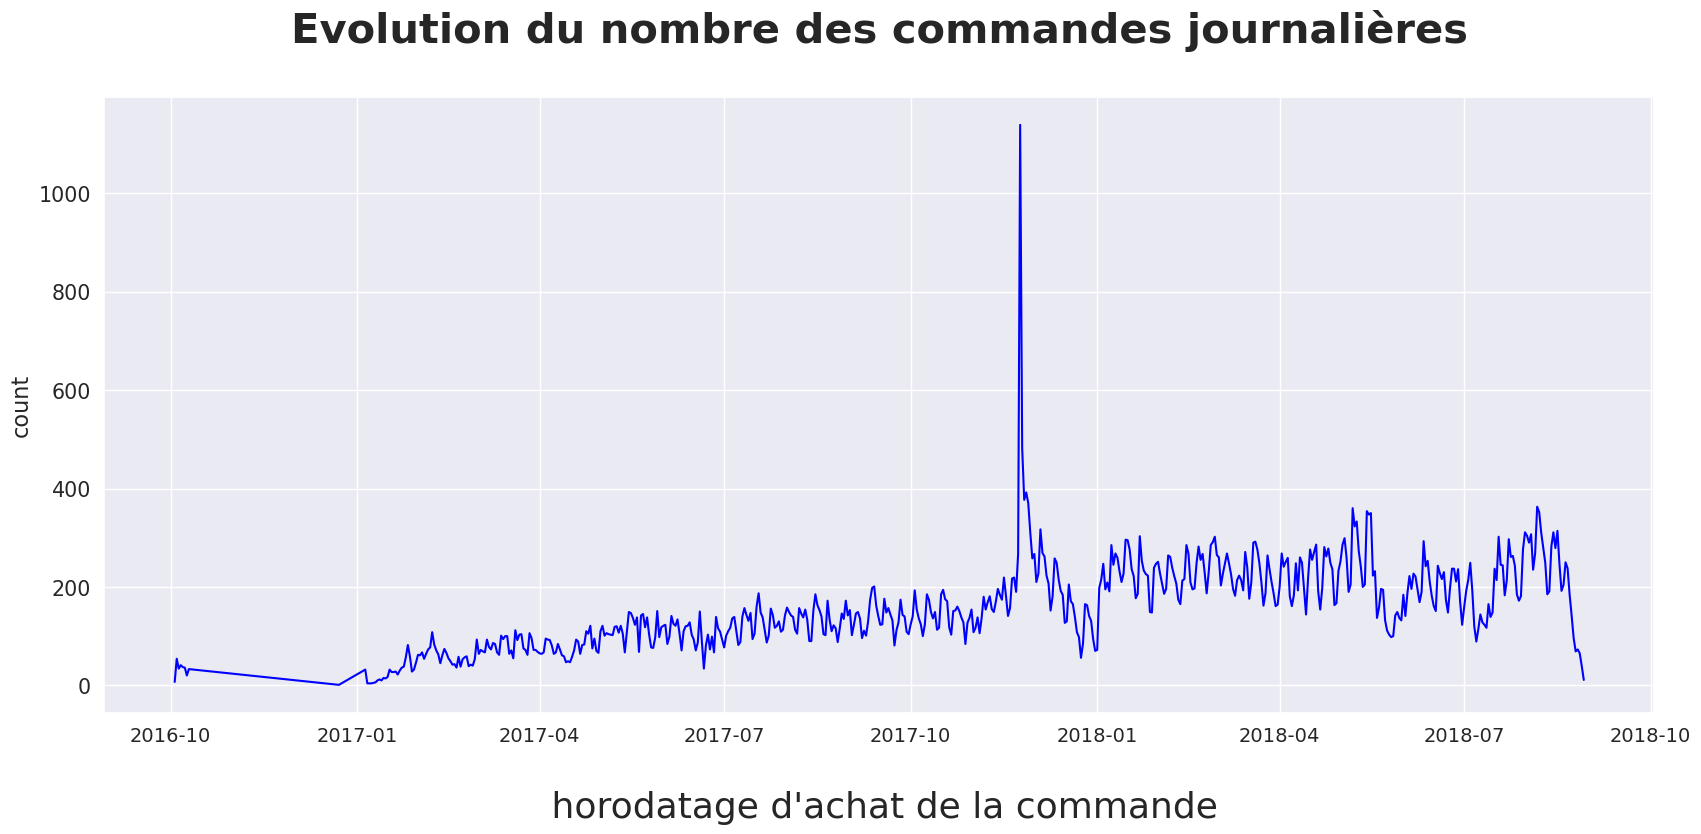

In [60]:
les_achats_journalieres = df_final.groupby(df_final["order_purchase_timestamp"].dt.date).count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = les_achats_journalieres.plot(color='blue')
ax.set_ylabel("count")
plt.title(f"Evolution du nombre des commandes journalières\n",
          fontdict=font_title)
plt.xticks(size=14)
plt.xlabel('\n horodatage d\'achat de la commande', fontsize=26)
plt.show()

Nous constatons un pic d'achats au cours de la période novembre-decembre 2017

### Répartition des commandes(mois/jour/heure)

- Par mois

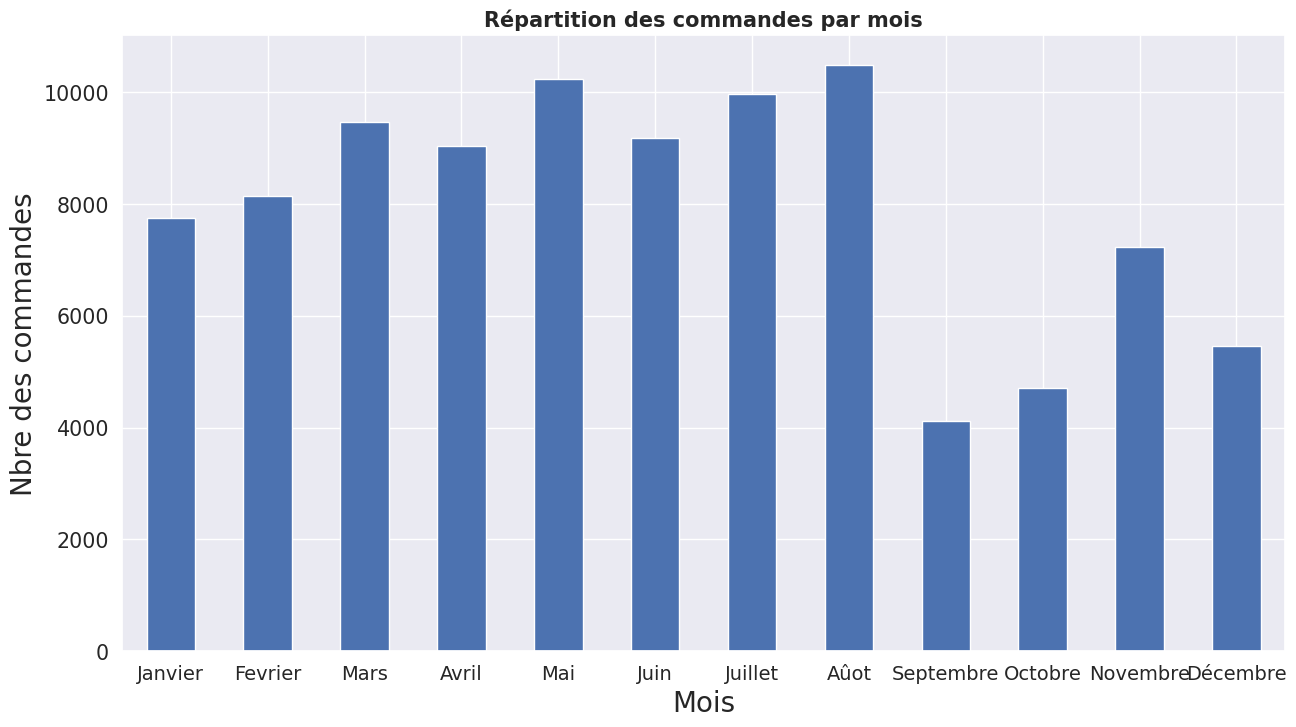

In [61]:
df_final.groupby(df_final['order_purchase_timestamp'].dt.month).agg({"order_id": "nunique"})\
    .plot(figsize=(15,8), kind="bar", legend=False)
plt.xticks(np.arange(0,12), ['Janvier','Fevrier','Mars','Avril','Mai','Juin',
                             'Juillet','Aûot','Septembre','Octobre','Novembre','Décembre'], 
           rotation='horizontal')
plt.title(f"Répartition des commandes par mois",fontdict = font_title, fontsize=15)
#plt.title(f"Par mois",fontdict = font_title)
plt.xlabel('Mois', fontsize=20)
plt.ylabel('Nbre des commandes', fontsize=20)
plt.xticks(size=14)
plt.show()

Les clients passent moins de commandes en septembre et octobre

- Par jour de la semaine

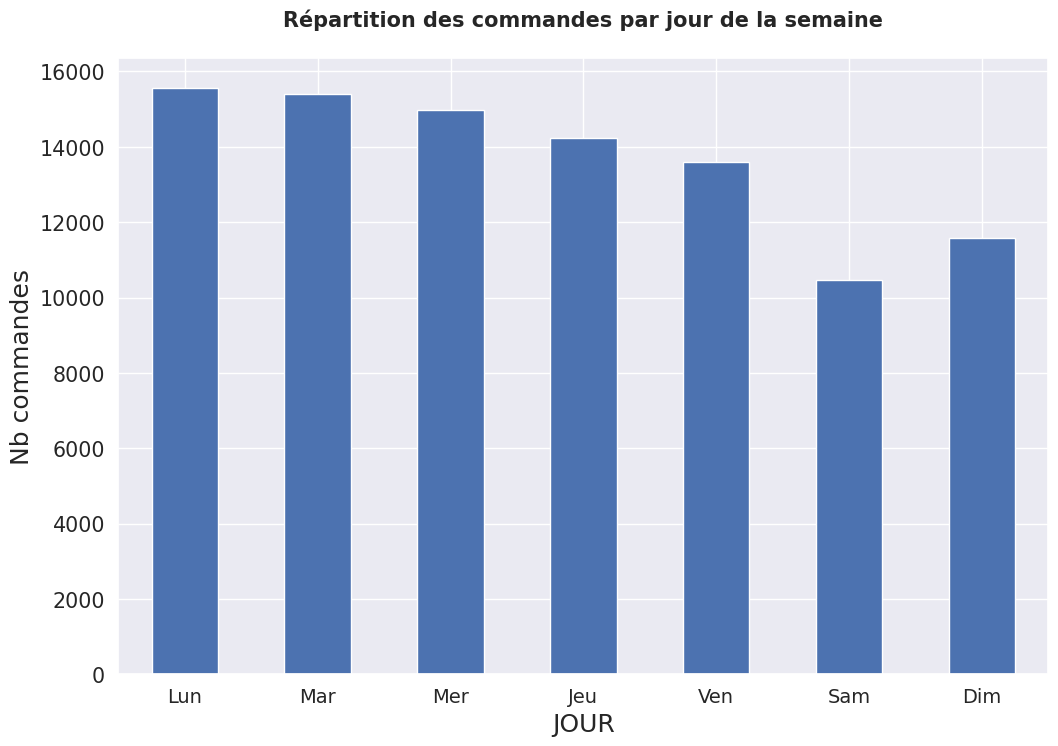

In [62]:
df_final.groupby(df_final['order_purchase_timestamp'].dt.dayofweek).agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar", legend=False)
plt.xticks(np.arange(0,7), ['Lun','Mar','Mer','Jeu','Ven','Sam','Dim'], rotation='horizontal')
plt.title(f"Répartition des commandes par jour de la semaine\n",fontdict = font_title, fontsize=15)
#plt.title(f"Par jour de la semaine\n",fontdict = font_title)
plt.xlabel('JOUR', fontsize=18)
plt.ylabel('Nb commandes', fontsize=18)
plt.xticks(size=14)
plt.show()

Nbre de commande moins élevé pendant le week-end

Par heure du journée

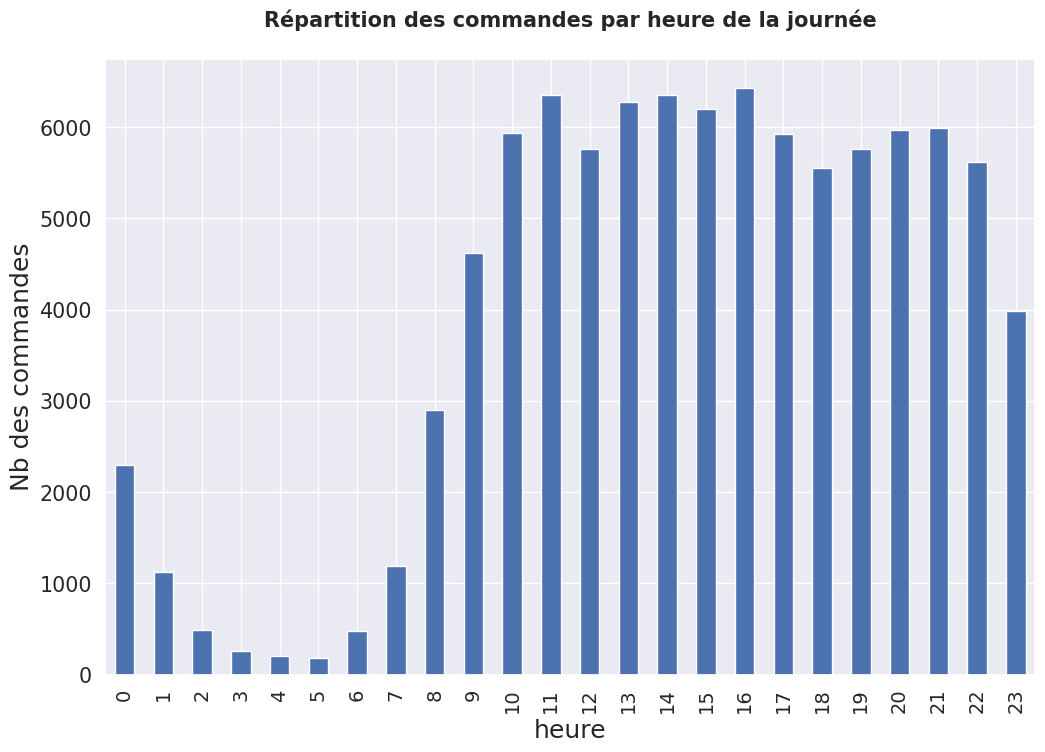

In [63]:
df_final.groupby(df_final['order_purchase_timestamp'].dt.hour).agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar", legend=False)
plt.title(f"Répartition des commandes par heure de la journée\n",fontdict = font_title, fontsize=15)
#plt.title(f"Par heure de la journée\n",fontdict = font_title)
plt.xlabel('heure', fontsize=18)
plt.ylabel('Nb des commandes', fontsize=18)
plt.xticks(size=14)
plt.show()

Les clients commandent beaucoup moins pendant la nuit

### Chiffre d'affaire sur les mois de l'année

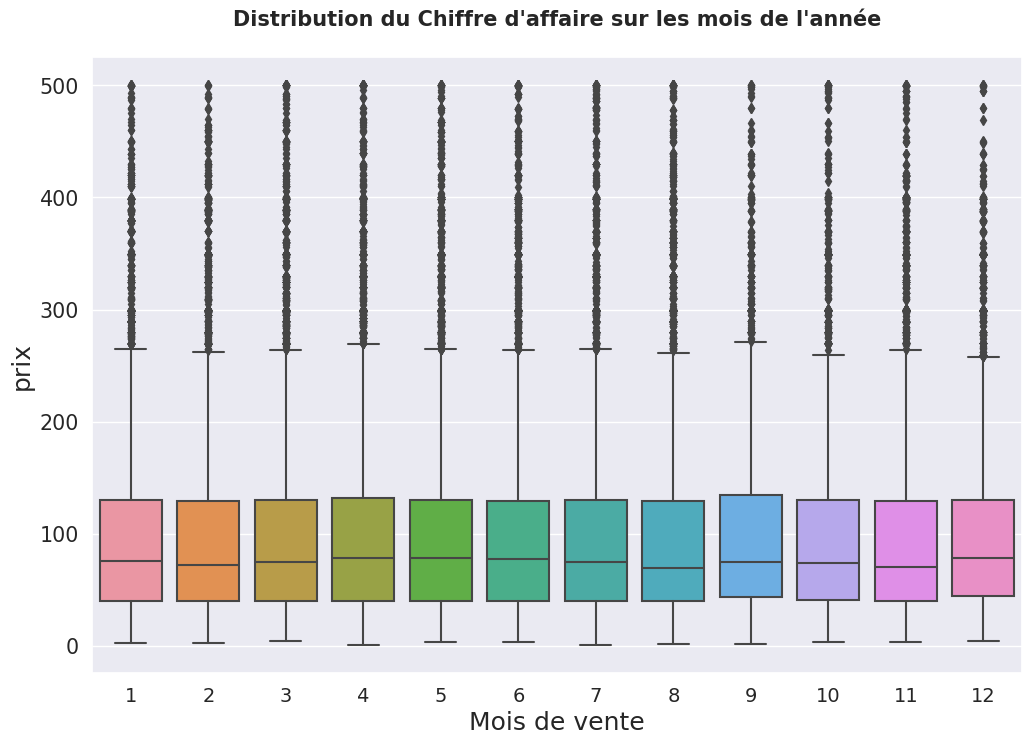

In [64]:
df_final["sale_month"] = df_final['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=df_final[df_final.Montant < 500], x="sale_month", y="Montant")
plt.title(f"Distribution du Chiffre d'affaire sur les mois de l'année\n",fontdict = font_title, fontsize=15)
plt.xlabel('Mois de vente', fontsize=18)
plt.ylabel('prix', fontsize=18)
plt.xticks(size=14)
plt.show()

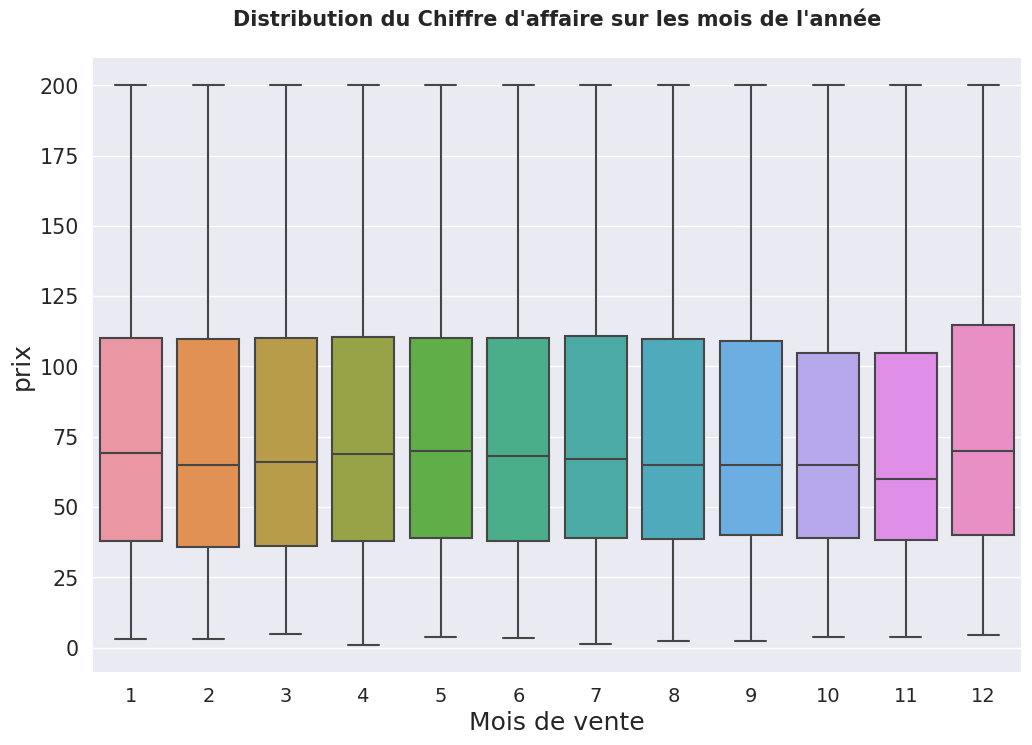

In [65]:
df_final["sale_month"] = df_final['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=df_final[df_final.Montant < 200], x="sale_month", y="Montant")
plt.title(f"Distribution du Chiffre d'affaire sur les mois de l'année\n",fontdict = font_title, fontsize=15)
plt.xlabel('Mois de vente', fontsize=18)
plt.ylabel('prix', fontsize=18)
plt.xticks(size=14)
plt.show()

Le chiffre d'affaire est plutot stable au cours des mois de l'année

### Répartion des notes attribuées aux commandes 

In [66]:
## Jointure items et reviews
list_reviews = Avis_commande.groupby("order_id").agg({"review_id": "count","review_score": "mean"})

items = pd.merge(Items_commandes, list_reviews, how="left", on="order_id")

items = items.rename(columns={"review_id": "is_reviewed"})

items["is_reviewed"] = np.where(items["is_reviewed"] == 1, True, False)

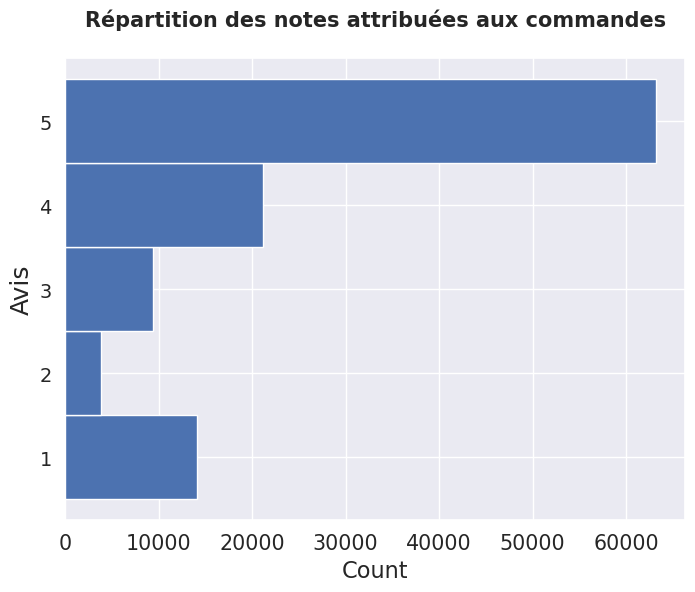

In [67]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(data=items, y="review_score", discrete=True, alpha=1)
plt.title(f"Répartition des notes attribuées aux commandes\n", fontdict=font_title, fontsize=15)
plt.ylabel('Avis', fontsize=18)
plt.yticks(size=14)
plt.show()

Les clients donnent majoritairement des notes favorables

### Nombre moyen d'articles par commande

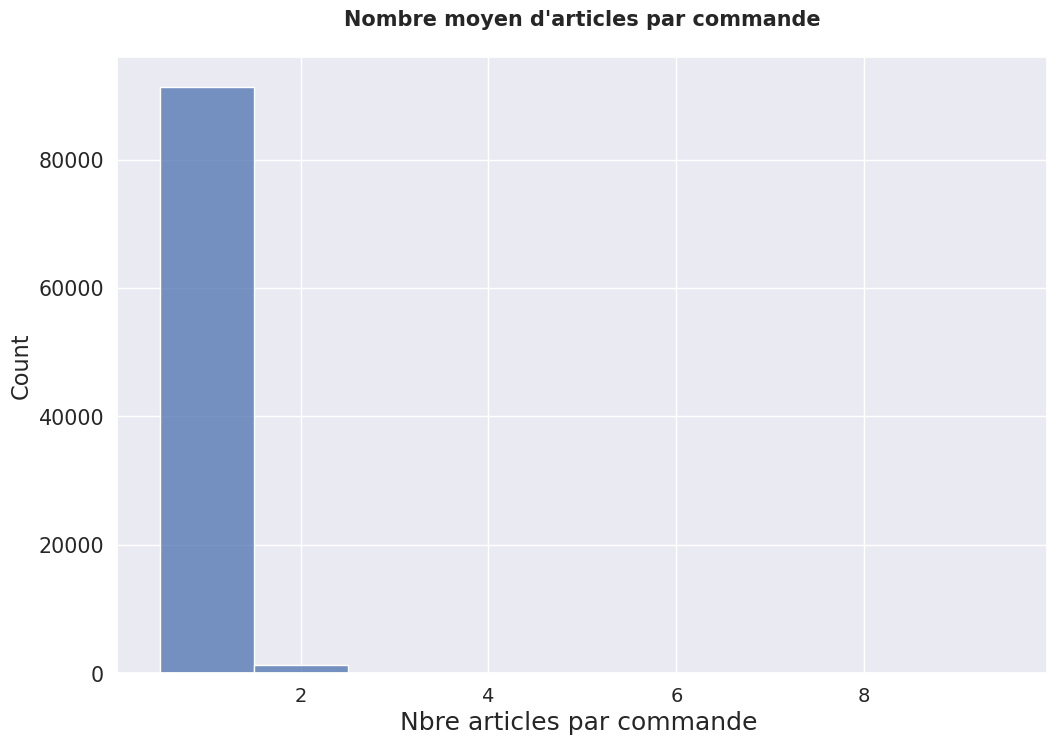

In [68]:
produits_par_commande = df_final.groupby("customer_unique_id").agg({"order_item_id": "mean"})

# Plot densité de items en commande
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = produits_par_commande,
             x="order_item_id",
             discrete=True)
plt.xlabel("Nbre articles par commande ", fontsize=18)
plt.title(f"Nombre moyen d'articles par commande\n",
          fontdict=font_title, fontsize=15)
plt.xticks(size=14)
plt.show()

Peu de commande qui ont plus d'un article

### RFM + Avis

#### Fréquence

In [69]:
frequence_achat = pd.DataFrame(df_final.customer_unique_id.value_counts().reset_index())
frequence_achat.columns=["customer_unique_id","Frequence"]

Text(0.5, 1.0, "Fréquence d'achats par client")

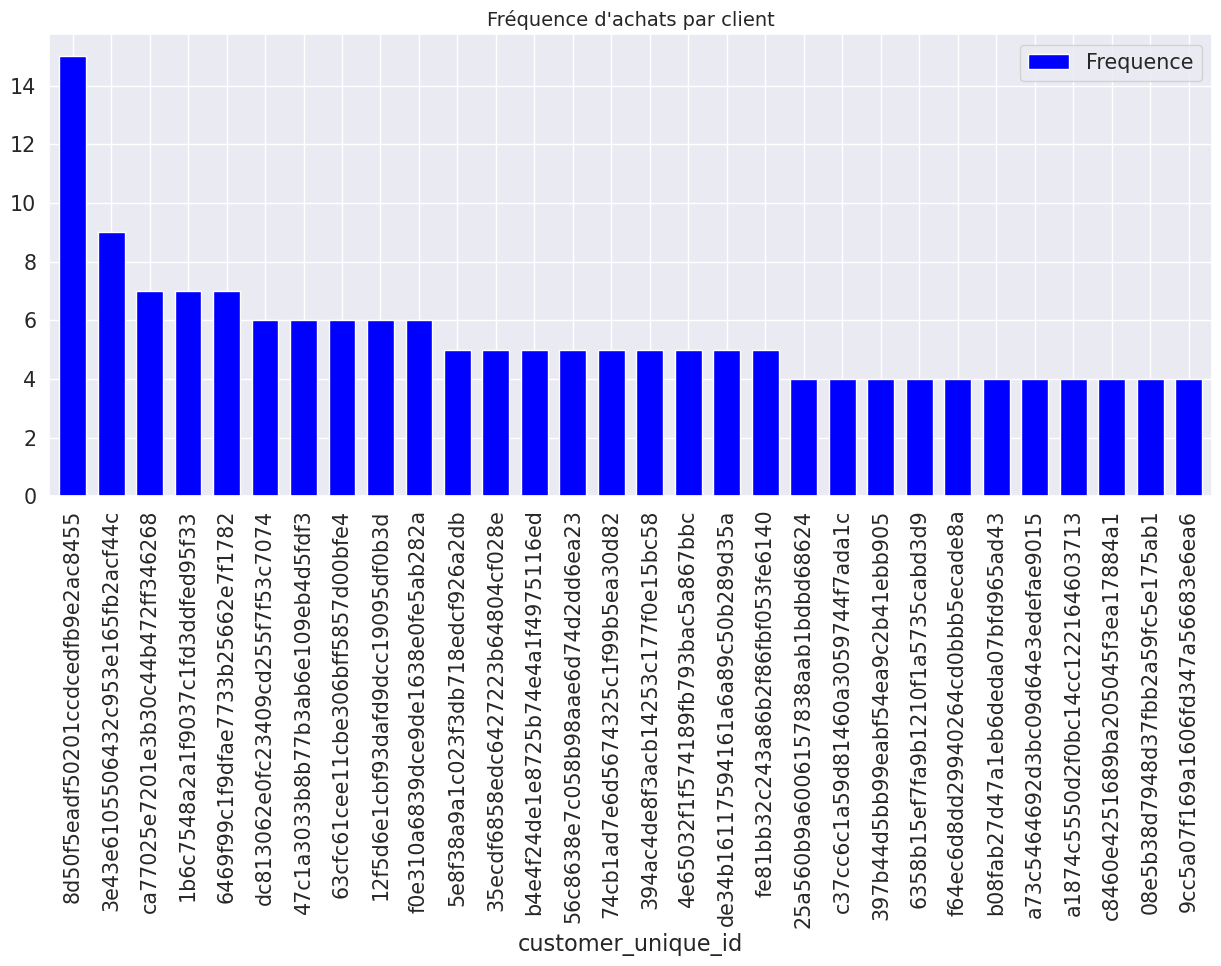

In [70]:
ax = frequence_achat[:30].plot.bar(x="customer_unique_id", y="Frequence",figsize=(15,6),color="blue",width=0.7)
ax.set_title("Fréquence d'achats par client", fontsize=14)

<AxesSubplot:xlabel='Frequence'>

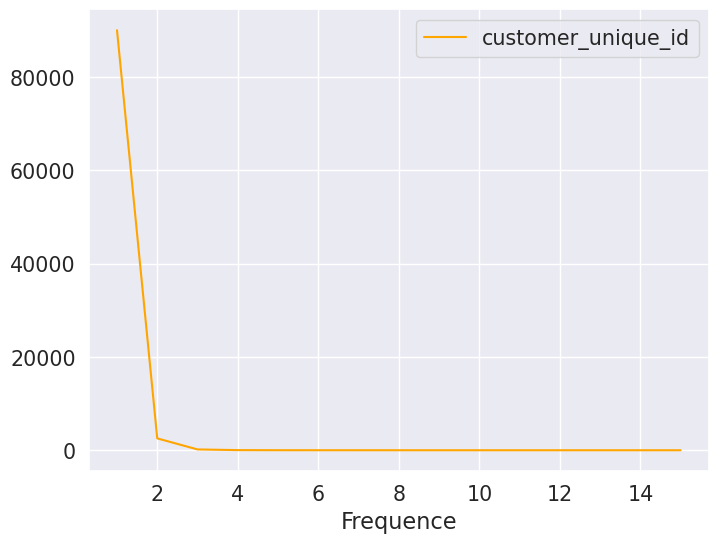

In [71]:
frequence_achat.groupby("Frequence").count().plot(figsize=(8,6),color="orange")

#### Montant

### Nombre des produits achetés par client

In [72]:
client_montant_total = df_final.groupby(by="customer_unique_id").sum()
client_montant_total = client_montant_total.reset_index()

In [73]:
cluster_table = pd.merge(client_montant_total,frequence_achat,on="customer_unique_id")
cluster_table = cluster_table.sort_values(by="Frequence",ascending=False)

Text(0.5, 1.0, 'Le nombre total de produits achetés par client')

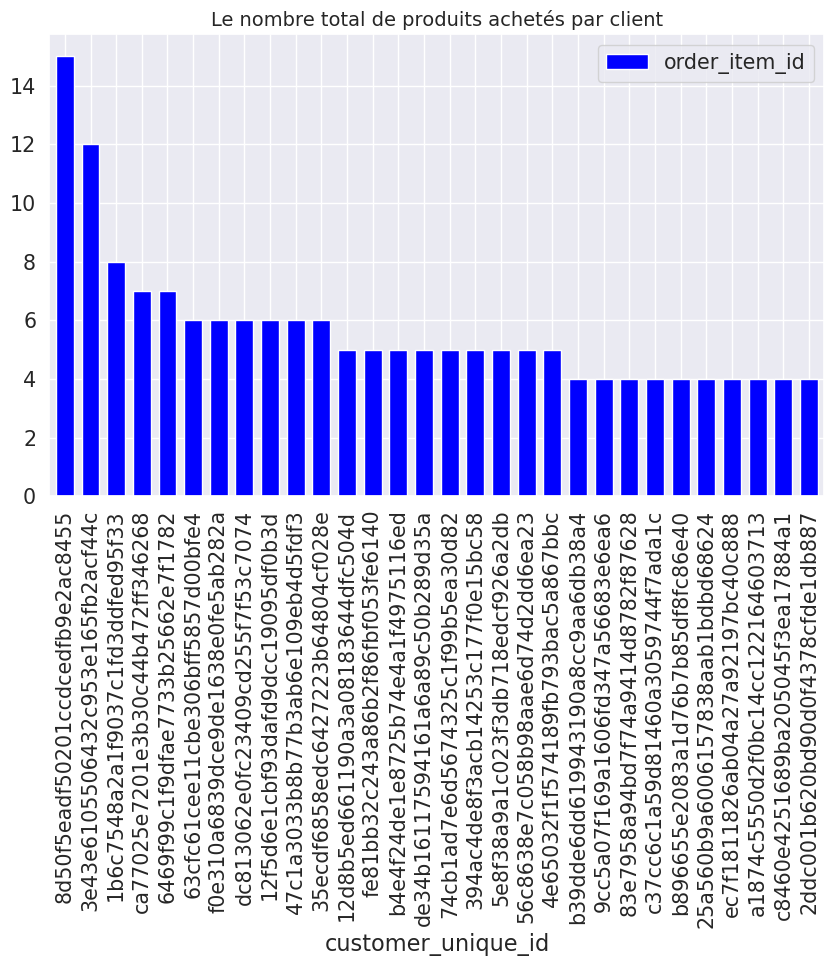

In [74]:
ax = cluster_table[:30].sort_values(by="order_item_id",ascending=False).plot.bar(x="customer_unique_id", y="order_item_id",figsize=(10,6),color="blue",width=0.7)
ax.set_title("Le nombre total de produits achetés par client", fontsize=14)

<AxesSubplot:xlabel='order_item_id'>

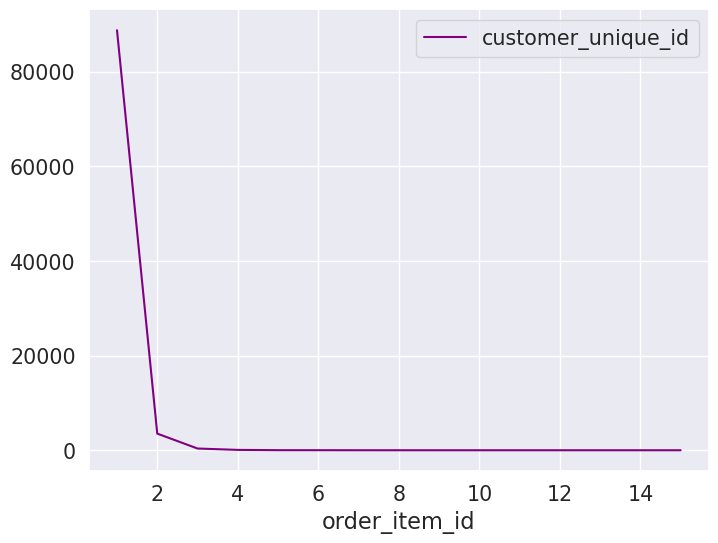

In [75]:
oi = cluster_table[["customer_unique_id","order_item_id"]]
oi.groupby("order_item_id").count().plot(figsize=(8,6),color="purple")

##### Récence

In [76]:
# la plus vieille date de commande 
print(df_final["order_purchase_timestamp"].min())
# la plus récente date de commande
print(df_final["order_purchase_timestamp"].max())

2016-10-03 09:44:50
2018-08-29 15:00:37


In [77]:
date_approved = df_final[["customer_unique_id","order_approved_at"]]

In [78]:
today = pd.to_datetime("2023-01-01")
dt = date_approved.copy()
dt["Recence"] = (today - date_approved["order_approved_at"]).dt.days

In [79]:
#J on garde la date d'achat la plus récente pour distinguer les nouveaux et les anciens clients
dt = dt.groupby("customer_unique_id").agg("min").reset_index()

In [80]:
cluster_table_final = pd.merge(cluster_table,dt,on="customer_unique_id")

#### Avis

In [81]:
cluster_table_final["Avis"] = round(cluster_table_final["review_score"] / cluster_table_final["Frequence"])

In [82]:
cluster_table_final = cluster_table_final[["customer_unique_id","Montant","Frequence","Recence","Avis"]]

In [83]:
cluster_table_final.head(5)

,customer_unique_id,Montant,Frequence,Recence,Avis
0,8d50f5eadf50201ccdcedfb9e2ac8455,714.63,15,1594,5.0
1,3e43e6105506432c953e165fb2acf44c,657.25,9,1768,3.0
2,ca77025e7201e3b30c44b472ff346268,666.66,7,1673,5.0
3,6469f99c1f9dfae7733b25662e7f1782,614.40,7,1647,5.0
4,1b6c7548a2a1f9037c1fd3ddfed95f33,621.22,7,1780,5.0


In [84]:
cluster_table_final.Frequence.agg(["min","max"])

min     1
max    15
Name: Frequence, dtype: int64

In [85]:
cluster_table_final.Avis.agg(["min","max"])

min    1.0
max    5.0
Name: Avis, dtype: float64

In [86]:
cluster_table_final.Montant.agg(["min","max"])

min       0.85
max    7388.00
Name: Montant, dtype: float64

In [87]:
cluster_table_final["Recence"].min()

1585

In [88]:
cluster_table_final["Recence"].max()

2279

### Nombre d'achats total en fonction du temps

Text(0.5, 1.0, "Evolution du nombre d'achats en fonction du temps")

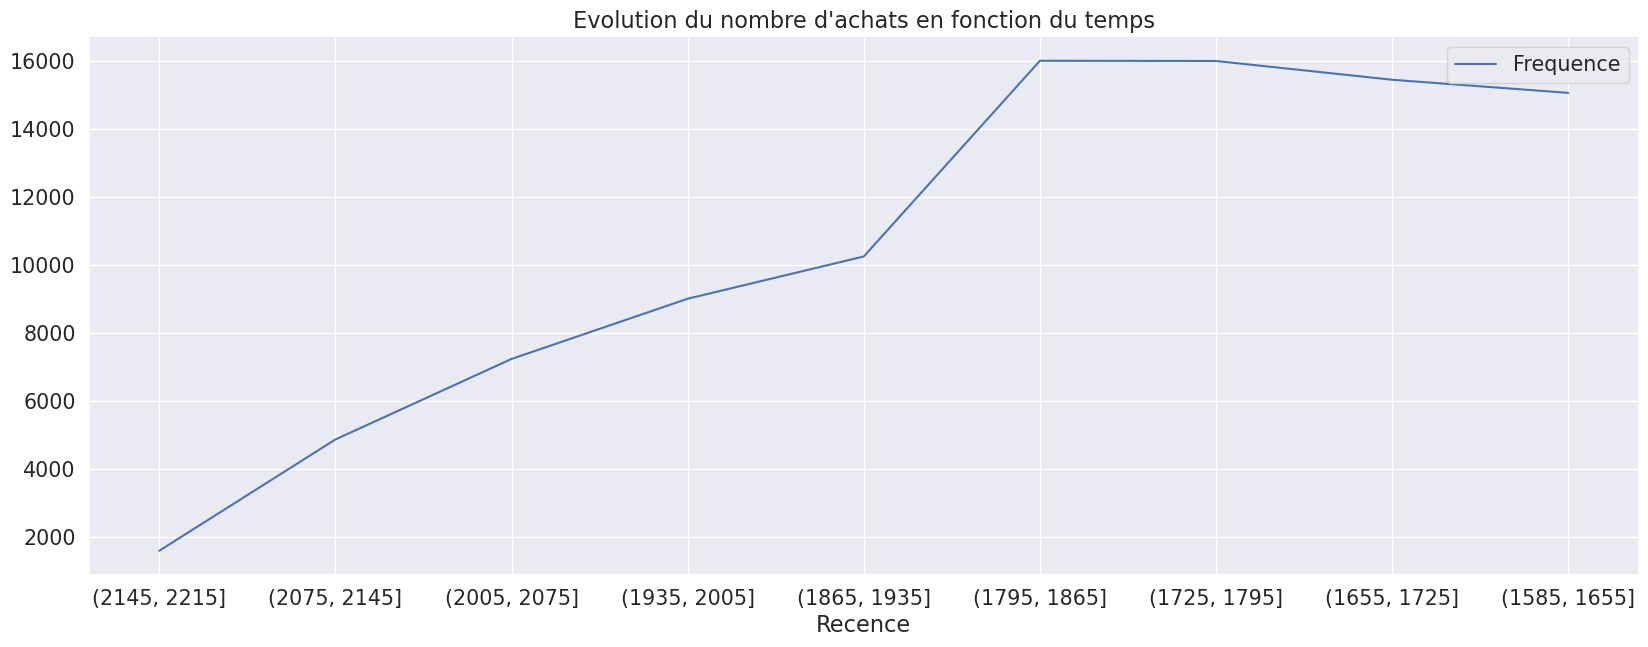

In [89]:
achats_temps = cluster_table_final.groupby(pd.cut(cluster_table_final["Recence"], np.arange(1585,2279,70))).sum()
achats_temps = achats_temps[["Frequence"]]

ax = achats_temps.plot(figsize=(20,7))
ax.invert_xaxis()
plt.title("Evolution du nombre d'achats en fonction du temps")

Text(0.5, 1.0, "Evolution du nombre d'achats en fonction du temps")

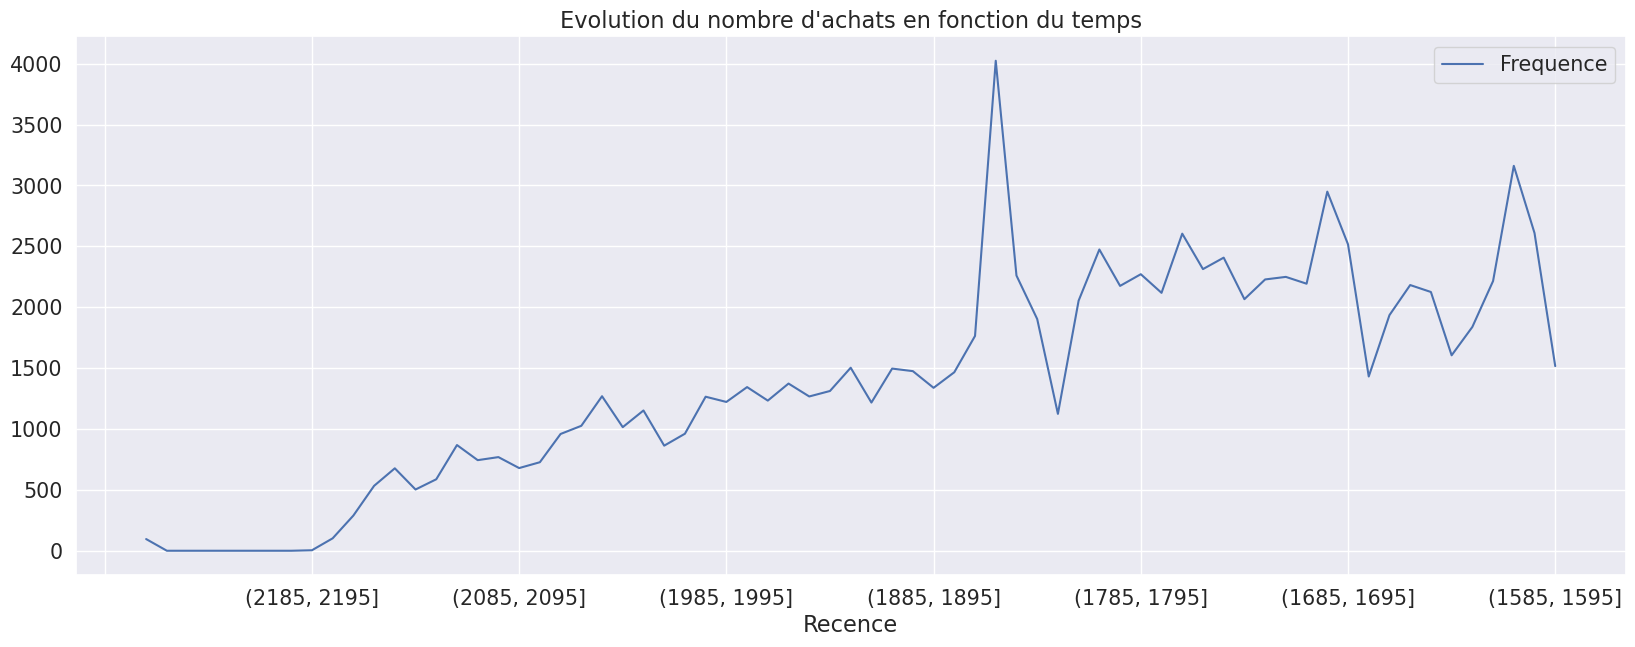

In [90]:
achats_temps = cluster_table_final.groupby(pd.cut(cluster_table_final["Recence"], np.arange(1585,2279,10))).sum()
achats_temps = achats_temps[["Frequence"]]

ax = achats_temps.plot(figsize=(20,7))
ax.invert_xaxis()
plt.title("Evolution du nombre d'achats en fonction du temps")

### EXPORT DES DONNÉES

In [91]:
#Sauvegarde de la base de données finale  
cluster_table_final.to_csv("data/data_cleaned")

### Fin